# An introduction to Artificial Neural Networks

For most AI aficionados, deep learning may seem like the innovation of yesterday. However, deep learning methods are still revolutionising the way we think about many fields today. I've seen that happen with [protein structure prediction](https://www.nature.com/articles/s41586-019-1923-7), a field I've worked on for a bit of time ;)

Perhaps the most iconic deep learning methods that you may have heard of will include:
* The convolutional neural network (CNN) and 
* The recurrent neural network (RNN). 

CNNs have changed the way we think about image classification, while RNNs have been hugely influential in sequential problems (e.g. text recognition).

But, before we talk about CNNs and RNNs, we should take a step back and ask _what_ is a neural network. For some, this may still seem like a black box, especially if you've never had any formal training in the area. In this post, I'll try to explain what neural networks are, and hopefully do a bit of jargon busting along the way. 

If you have...
* **30 seconds**: neural networks are a _family_ of algorithms in artificial intelligence. Inspired by biological neurons, they can perform extremely well. However, poor design choices can lead to some unusual behaviours, and for some tasks, they may not even be _the_ method of choice.
* **15 minutes**: go on. If you're happy with some basic terminology, feel free to just jump to the code section.

## Preamble + Jargon Buster

The artificial neural network was inspired in part by the biological neuron:

![image](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)

The idea here is, each neuron takes an input (i.e. incoming neurotransmitters). From the combination of inputs, it produces an output signal (i.e. an action potential). When a series of neurons work sequentially and in tandem, you get an entire network.

From the view of artificial intelligence, a "neuron" is really a unit that computes some function given some input. We can see some parallels when we use simplified circles and arrows, and how they can line up as a "network":

![image](neuralnetwork.png)

What makes neural networks special, in my view, are three things:

* **Neuron internals**: Each neuron can transform the input data. Once transformed, the data lies in a so-called hidden or "latent" space. In the original space, the data may not have had any obvious patterns, but in the latent representation, the data may show some neat patterns.
* **Backpropagation**: Using some neat calculus tricks, neural networks can be fine-tuned very well
* **Flexible architectures**: There are loads of ways to build networks to tailor for your type of data.

I've explained points 2 and 3 in more detail in the "Appendix" at the bottom. We'll explain point 1 as it's crucial.

### Neuron internals

To understand what we mean by 
> neural networks can transform the input data

We have to first review the humble linear regression - the "line of best fit".

$$ y = mx + b$$

The idea is that the predictor variable, $y$, is equivalent to a sum of the variable $x$ that's multiplied by some value $m$, along with an adjusting constant, $b$.

You can expand the idea to have multiple types of $x$s and their associated multipliers. To make life easier, and to keep consistency with math textbook notation, let's rewrite

$$ y = m_1x_1 + m_2x_2 + ... + b $$

as 

$$ y = b_1x_1 + b_2x_2 + ... + b_0 $$

Each of these $b_1, b_2, ... $ are multipliers; or in neural network speak, the _weights_. They are also known as a model's "parameters". By changing the $b$ values, the value of $y$ will change. 

The final term, $b_0$, is the intercept of the linear model, or _bias_ in neural network speak.

> This is called a "linear" model because the different $x$s are just multiplied by a scalar value (e.g. it's not that we take $x^2$, for example).

What neural networks do is to use the output of the linear regression, then apply _another_ mathematical function.

These functions are called _activation functions_. For example, the _sigmoid_ function

$$ S(y) = \dfrac{1}{1+e^{-y}} $$

is a non-linear function that transforms the output of the linear regression data into an S-shape.

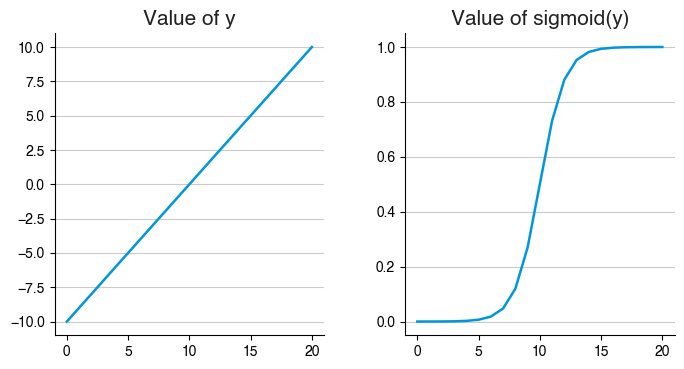

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Check out my matplotlib stylesheet!
plt.style.use("bbc")

fig, ax = plt.subplots(1,2)

# Let's just get 20 values from -10 to +10. (we do +11 here otherwise it stops at 9.)
y = np.arange(-10, 11)

def sigmoid(v):
    return 1./(1+np.exp(-1.*v))

ax[0].plot(y)
ax[1].plot(sigmoid(y))

ax[0].set_title("Value of y")
ax[1].set_title("Value of sigmoid(y)")

fig.set_size_inches((8,4))

Thus, a neuron with a **sigmoid** _activation function_ squishes the output of a linear regression into an S-curve within 0 and 1. If we repeat a similar type of logic across all neurons, the inputs will get transformed according to what we choose as the activation function. 

Once the data has been transformed by the activation function, this _transformed_ data can then be used as the input to a new group of neurons downstream! The downstream layer of neurons may or may not use the same activation function on the transformed data from the previous layer.

There's quite a few activation functions, and I've written a couple here for reference:

| Name | Equation | Range | What does it look like |
| ---- | -------- | ----- | ---------------------- |
| Linear | $y$ | $-\infty, +\infty$ | Just a straight diagonal line |
| Sigmoid | $$ S(y) = \dfrac{1}{1+e^{-y}} $$ | 0,1 | Shaped like an S curve |
| TanH | $$ tanh(y) $$ | -1,1 | Shaped like an S curve |
| Rectified Linear Unit (ReLu) | $$ Relu(y) = max(0,y) $$ | 0, $\infty$ |  Flat until y = 0, then diagonal |
| Softmax | $$ Softmax(y) = \dfrac{e^y}{\sum_{i=1}^{K} e^{y}} $$ | 0,1 | Shaped like an S curve |

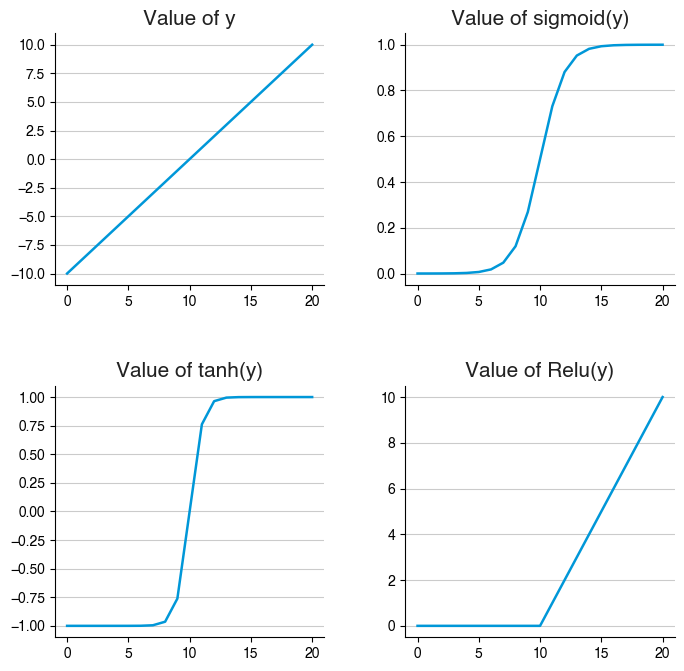

In [2]:
def tanh(v):
    return np.tanh(v)

def relu(v):
    return list(map(lambda _: max(0, _), v))

fig, axes = plt.subplots(2,2)
ax = axes.flatten()

ax[0].plot(y)
ax[1].plot(sigmoid(y))
ax[2].plot(tanh(y))
ax[3].plot(relu(y))

ax[0].set_title("Value of y")
ax[1].set_title("Value of sigmoid(y)")
ax[2].set_title("Value of tanh(y)")
ax[3].set_title("Value of Relu(y)")

fig.set_size_inches((8,8))

Now when we talk about neural networks, there is some jargon that's bound to float around. I'll leave this here for reference.

## Jargon Summary
* _Neuron_ : we refer to a neuron as one unit that computes some calculation.
* _Loss_ : a metric to describe how far we are off from the true value
* _Bias_ : the intercept
* _Weights_ : a series of multipliers for each variable
* _Activation function_ : a function that is applied to transform the output of a neuron

## The task at hand

To start, let's get some RNAseq data from GTEx. This diagram from [Nature](https://www.nature.com/articles/nature24277) just shows the huge diversity of the gene expression data sources. Building on a previous post where I clustered gene expression levels using DBSCAN, let's try to use a supervised approach and predict the tissues instead.

![image](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature24277/MediaObjects/41586_2017_Article_BFnature24277_Fig1_HTML.jpg)

### What are the use cases?
* If there is a loss of documentation, the gene expression pattern may tell us what tissue a sample is likely to be derived from.
* Determine if related tissues show similar expression profiles; vice-versa, do some genes behave in the same way across some tissues?
* Establish the boundaries of a "normal" or "healthy" tissue based on gene expression, allowing us to detect anomalies

## Data Prep

As I covered in my previous post, the GTEx gene expression data is pretty big. In fact, getting it all at once is not ideal. We're going to use some tricks:

* "Stream" the data – have a pointer to the data, but don't bring it in all at once.
* Use the most variably expressed genes - if a gene is expressed everywhere with low rates, or is only found in, say, one sample, it's not that informative.
* Use protein-coding genes.

In [3]:
# Importing useful things

import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from gzip import GzipFile
import io
import multiprocessing as mp
import numpy as np

# Some utility functions - feel free to skip
DECODE_CODEC = 'utf-8'

# This is the length of an Ensembl gene identifier which we'll use later.
ENSEMBL_LENGTH = 15

def stream_request(url):
    """
    Open a connection to some url, then stream data from it
    This has the advantage of:
    A. We don't have to wait for the entire file to download to do operations
    B. We can perform some operations on-the-fly
    """
    fh = urlopen(url)
    buffer = io.StringIO()
    
    for line in fh:
        decoded = line.decode(DECODE_CODEC)
        buffer.write(decoded)
    fh.close()
    
    # Reset the StringIO buffer to byte position 0
    buffer.seek(0)
    return buffer
    
def stream_request_to_pandas(url: str, sep: str = '\t') -> pd.DataFrame:
    streamed_buffer = stream_request(url)
    return pd.read_csv(streamed_buffer, sep = sep)

In [4]:
# Stream in and read protein-coding genes from HGNC
geneUrl = "https://www.genenames.org/cgi-bin/download/custom?col=gd_app_sym&col=gd_pub_ensembl_id&status=Approved&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&where=(gd_pub_chrom_map%20not%20like%20%27%25patch%25%27%20and%20gd_pub_chrom_map%20not%20like%20%27%25alternate%20reference%20locus%25%27)%0Aand%20gd_locus_type%20=%20%27gene%20with%20protein%20product%27&submit=submit"

# This is a short way to convert that URL into a table
gene_df = stream_request_to_pandas(geneUrl)

# Let's see what it looks like
gene_df.head()

Approved symbol  Ensembl gene ID
0            A1BG  ENSG00000121410
1            A1CF  ENSG00000148584
2             A2M  ENSG00000175899
3           A2ML1  ENSG00000166535
4         A3GALT2  ENSG00000184389

In [5]:
# Keep a list of protein identifiers here
proteins = gene_df['Ensembl gene ID'].values

Now let's get that big GTEx file 

In [6]:
# Open a handle onto the GTEx expression data
URL = "https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz"
urlHandle = urlopen(URL)

fh = GzipFile(fileobj=urlHandle)

# ignore the first two lines as they contain shape of the file
_ = fh.readline()
_ = fh.readline()

From that big GTEx file, let's get the column names; this is in the third line of the file.

In [7]:
header = fh.readline().decode(DECODE_CODEC).strip().split('\t')

Now, each line looks something like this:

In [8]:
first_row = np.array(fh.readline().decode(DECODE_CODEC).strip().split('\t'))
columns = np.append( np.array([0,1]), np.random.randint(2, len(header), 20) )

pd.DataFrame([first_row[columns]], columns=np.array(header)[columns])

Name Description GTEX-1C4CL-0826-SM-7EWEZ  \
0  ENSG00000223972.5     DDX11L1                  0.03693   

  GTEX-1KD5A-0526-SM-E9U55 GTEX-WYJK-1526-SM-4ONCW GTEX-WYBS-1226-SM-3NM9N  \
0                        0                 0.02178                0.009944   

  GTEX-1QP2A-1726-SM-E76QC GTEX-WWTW-0002-SM-4MVNH GTEX-XV7Q-1426-SM-4BRWA  \
0                        0                 0.03184                       0   

  GTEX-1GZ4I-1026-SM-9KNV5  ... GTEX-WEY5-1026-SM-4LMK9  \
0                        0  ...                       0   

  GTEX-13OVJ-0011-R8b-SM-5L3FS GTEX-P4PP-2026-SM-3P61N  \
0                            0                       0   

  GTEX-12WSG-0626-SM-5FQTQ GTEX-1JJ6O-1626-SM-CM2RM GTEX-P44G-2526-SM-2I5EK  \
0                        0                        0                       0   

  GTEX-1H23P-1426-SM-9JGH5 GTEX-ZV6S-1826-SM-5NQ8D GTEX-WOFM-0126-SM-3MJFE  \
0                        0                       0                       0   

  GTEX-XUZC-0226-SM-4BOO7  
0                       0  

[1 rows x 22 columns]

Okay, cool, so we now know that the third column onward just has numbers. The first column contains gene IDs.

Knowing this file format, let's get the most variable protein-coding genes. We'll also impose that at least half the samples have non-zero expression data. To assess variability, we're going to use a metric called mean absolute deviation, then store it. Another viable approach is calculating something like the entropy value.

Before we do so, we're going to $log$ transform the data. GTEx data has lots of 0s, and TPM units can be out of scale.

In [9]:
def get_gene_mad(values):
    """
    The mean absolute deviation is equal to avg( abs(x - avg) )
    """
    mu_x = np.mean(values)
    mad = np.mean(np.abs(values - mu_x))    
    return mad

def wrapper(index, line):
    """
    This is a function we'll call with a parallel pool connection.
    We ignore any line that contains non protein-coding genes
    """
    if index % 5000 == 0:
        print("Processing line {}".format(index))
        
    tokenised_line = line.decode(DECODE_CODEC).strip().split('\t')
    gene_id = tokenised_line[0][:ENSEMBL_LENGTH]
    
    # If it's not a protein-coding gene, let's ignore
    if gene_id not in proteins:
        return None
    
    numeric_values = np.array(tokenised_line[2:], dtype=float)
    array_cutoff = len(numeric_values) / 2.
    
    # If more than half the data is zero, then let's ignore
    if sum(numeric_values == 0) >= array_cutoff:
        return None
    
    numeric_values = np.log(numeric_values+1)
    mad = get_gene_mad(numeric_values)
    
    return gene_id, mad, tokenised_line

To see what log transformation can do, see this plot from my [previous post]().

In [10]:
keep_data = []
gene_mad = {}

# Close the previous connection
fh.close()

# Re-establish the connection, and skip the first three lines
urlHandle = urlopen(URL)
fh = GzipFile(fileobj=urlHandle)

print("Re-established connection, skipping 3 lines...")
[fh.readline() for i in range(3)]

# Let's parallelise this to make it faster
pool = mp.Pool(4)

# Let's get some results where we have just protein coding genes.
jobs = [pool.apply_async(wrapper, args=(i,line,)) for i,line in enumerate(fh) ]
results = [j.get() for j in jobs]
filtered_results = [ r for r in results if r is not None ]
del results

Re-established connection, skipping 3 lines...
Processing line 0
Processing line 5000
Processing line 10000
Processing line 15000
Processing line 20000
Processing line 25000
Processing line 30000
Processing line 35000
Processing line 40000
Processing line 45000
Processing line 50000
Processing line 55000


Brilliant, now that we have our gene MAD values we can just select the top, say, 1000 genes.

In [11]:
TOP = 1000
sorted_genes = sorted(filtered_results, key = lambda x: x[1], reverse=True)[:TOP]

In [12]:
# Let's create a dataframe
df = pd.DataFrame(
    [ np.log(np.array(_[2][2:],float)+1) for _ in sorted_genes ],
    columns = header[2:],
    index = [ _[2][0] for _ in sorted_genes ]
)
df.head()

GTEX-1117F-0226-SM-5GZZ7  GTEX-1117F-0426-SM-5EGHI  \
ENSG00000175084.11                  4.326250                  9.315691   
ENSG00000163017.13                  3.676301                  0.992881   
ENSG00000129824.15                  0.657572                  0.301215   
ENSG00000188257.10                  6.401751                  2.055661   
ENSG00000133392.17                  4.576668                  2.816606   

                    GTEX-1117F-0526-SM-5EGHJ  GTEX-1117F-0626-SM-5N9CS  \
ENSG00000175084.11                  7.279319                  6.765961   
ENSG00000163017.13                  5.838313                  5.675726   
ENSG00000129824.15                  0.657520                  0.269111   
ENSG00000188257.10                  5.558371                  8.897409   
ENSG00000133392.17                  7.956477                  7.628518   

                    GTEX-1117F-0726-SM-5GIEN  GTEX-1117F-1326-SM-5EGHH  \
ENSG00000175084.11                  8.352083                  3.471034   
ENSG00000163017.13                  1.372449                  2.273362   
ENSG00000129824.15                  0.172187                  0.490847   
ENSG00000188257.10                  8.184235                  7.244228   
ENSG00000133392.17                  3.418054                  3.593744   

                    GTEX-1117F-2426-SM-5EGGH  GTEX-1117F-2526-SM-5GZY6  \
ENSG00000175084.11                  8.718009                  5.196285   
ENSG00000163017.13                  7.163172                  4.175156   
ENSG00000129824.15                  0.468628                  0.434247   
ENSG00000188257.10                  2.373230                  2.971952   
ENSG00000133392.17                  7.555382                  4.523201   

                    GTEX-1117F-2826-SM-5GZXL  GTEX-1117F-2926-SM-5GZYI  ...  \
ENSG00000175084.11                  3.599502                  5.269403  ...   
ENSG00000163017.13                  4.438643                  4.447112  ...   
ENSG00000129824.15                  0.705570                  0.421732  ...   
ENSG00000188257.10                  5.105945                  5.544005  ...   
ENSG00000133392.17                  4.839451                  4.103800  ...   

                    GTEX-ZZPU-1126-SM-5N9CW  GTEX-ZZPU-1226-SM-5N9CK  \
ENSG00000175084.11                 8.928243                 3.787593   
ENSG00000163017.13                 1.097612                 3.291754   
ENSG00000129824.15                 0.087205                 0.176471   
ENSG00000188257.10                 7.736744                 2.338338   
ENSG00000133392.17                 4.662495                 4.480060   

                    GTEX-ZZPU-1326-SM-5GZWS  GTEX-ZZPU-1426-SM-5GZZ6  \
ENSG00000175084.11                 4.419443                 7.711549   
ENSG00000163017.13                 2.410542                 7.272398   
ENSG00000129824.15                 0.441347                 0.457678   
ENSG00000188257.10                 4.113330                 5.875212   
ENSG00000133392.17                 4.500698                 7.333676   

                    GTEX-ZZPU-1826-SM-5E43L  GTEX-ZZPU-2126-SM-5EGIU  \
ENSG00000175084.11                 9.522300                 5.414321   
ENSG00000163017.13                 8.706656                 4.299596   
ENSG00000129824.15                 0.303359                 0.000000   
ENSG00000188257.10                 6.281893                 5.697764   
ENSG00000133392.17                 9.499347                 5.609838   

                    GTEX-ZZPU-2226-SM-5EGIV  GTEX-ZZPU-2426-SM-5E44I  \
ENSG00000175084.11                 1.776477                 7.810353   
ENSG00000163017.13                 0.728997                 6.695181   
ENSG00000129824.15                 0.312180                 0.389674   
ENSG00000188257.10                 0.606935                 5.258016   
ENSG00000133392.17                 1.660701                 8.608313   

                    GTEX-ZZPU-262

#### Looking out for Batch Effects
While we have our top 1000 most variably expressed genes, there is a caveat! Gene expression data can be prone to batch effects (i.e. technical variation). To check for this behaviour, let's get some sample annotations.

In [13]:
sample_url = "https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt"
sample_metadata = stream_request_to_pandas(sample_url)
subset = sample_metadata[sample_metadata['SAMPID'].isin(df.columns)].copy()

tissue_column = 'SMTSD'
batch_column = 'SMGEBTCH'

subset.iloc[:3][['SAMPID', tissue_column, batch_column]]

SAMPID                   SMTSD    SMGEBTCH
5  GTEX-1117F-0226-SM-5GZZ7  Adipose - Subcutaneous  LCSET-4804
6  GTEX-1117F-0426-SM-5EGHI       Muscle - Skeletal  LCSET-4764
7  GTEX-1117F-0526-SM-5EGHJ         Artery - Tibial  LCSET-4764

We can see that each sample has an associated batch ID. We can colour our plot by the batch ID and the tissue:

/Users/jleem/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


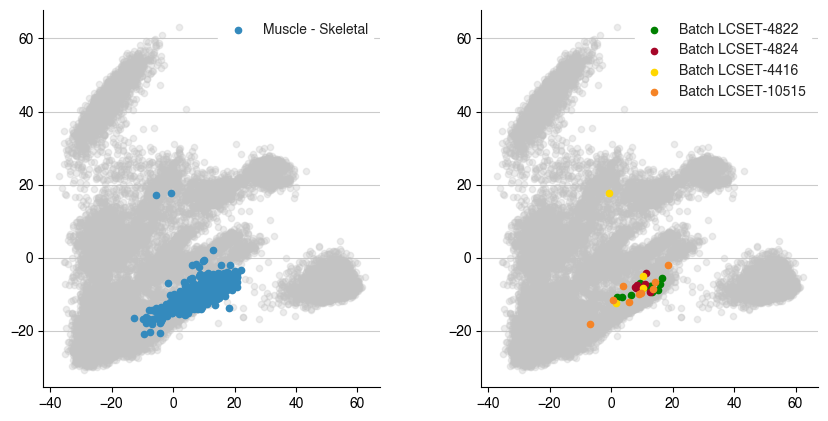

In [14]:
from sklearn.decomposition import PCA

sample_id_to_batch = subset[['SAMPID', batch_column]]
sample_id_to_tissue = subset[['SAMPID', tissue_column]]

pca = PCA()

# We take the transpose of our gene expression because otherwise PCA would find the samples that are most varied
# Rather than the genes that are most varied.
coords = pca.fit_transform(df.T.values)

fig, ax = plt.subplots(1,2)

special_tissue = 'Muscle - Skeletal'
tissue_dots = np.argwhere(sample_id_to_tissue[tissue_column]==special_tissue).flatten()

t1_name = "LCSET-4822"
t2_name = "LCSET-4824"
t3_name = "LCSET-4416"
t4_name = "LCSET-10515"

t1 = np.argwhere(sample_id_to_batch[batch_column]==t1_name).flatten() 
t2 = np.argwhere(sample_id_to_batch[batch_column]==t2_name).flatten()
t3 = np.argwhere(sample_id_to_batch[batch_column]==t3_name).flatten()

t4 = np.argwhere(sample_id_to_batch[batch_column]==t4_name).flatten()

t1_inter = np.intersect1d(t1, tissue_dots)
t2_inter = np.intersect1d(t2, tissue_dots)
t3_inter = np.intersect1d(t3, tissue_dots)
t4_inter = np.intersect1d(t4, tissue_dots)

ax[0].scatter(coords[:,0], coords[:,1], color = '#c3c3c3', alpha = 0.3)
ax[0].scatter(coords[tissue_dots,0], coords[tissue_dots,1], color = '#348abd', 
              label = special_tissue)

ax[1].scatter(coords[:,0], coords[:,1], color = '#c3c3c3', alpha = 0.3)
ax[1].scatter(coords[t1_inter,0], coords[t1_inter,1], color = 'green', label = "Batch {}".format(t1_name))
ax[1].scatter(coords[t2_inter,0], coords[t2_inter,1], color = '#a60628', label = "Batch {}".format(t2_name))
ax[1].scatter(coords[t3_inter,0], coords[t3_inter,1], color = '#ffd700', label = "Batch {}".format(t3_name))
ax[1].scatter(coords[t4_inter,0], coords[t4_inter,1], color = '#f58426', label = "Batch {}".format(t4_name))

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
fig.set_size_inches((10,5))

There does seem to be some level of batch effect, which we can adjust using tools like [ComBat](https://github.com/brentp/combat.py), but we won't do that here, and use the data as-is for simplicity.

## Coding up the NN

To code up our neural network, we are spoiled for choice - there's loads of solutions (TensorFlow, PyTorch), but the simplest framework in my mind is Keras. One of the advantages of Keras is that it is very easy to read, and covers a a good range of use cases (e.g. convolutional layers). To train a neural network to predict the tissue that a gene belongs to, we need to know which tissue the sample is from (i.e. the truth).

In [15]:
subset.iloc[:3][['SAMPID', tissue_column]]

SAMPID                   SMTSD
5  GTEX-1117F-0226-SM-5GZZ7  Adipose - Subcutaneous
6  GTEX-1117F-0426-SM-5EGHI       Muscle - Skeletal
7  GTEX-1117F-0526-SM-5EGHJ         Artery - Tibial

Since our data is arranged in the format of _genes $\times$ samples_ , we are going to transpose the matrix. This is because we want the neural network to take, the expression profile _per sample_ as opposed to _per gene_. 

This way, it'll predict what tissue we should assign for a particular sample.

In [16]:
# Get a dictionary of sample id to tissue site
sample_to_tissue = dict(subset[['SAMPID', tissue_column]].values)

# Get the tranposed matrix and subset a few columns for preview
mat = df.T
mat['TissueSite'] = [ sample_to_tissue[ix] for ix in mat.index ]
mat[ list(mat.columns[:3]) + ['TissueSite'] ]

ENSG00000175084.11  ENSG00000163017.13  \
GTEX-1117F-0226-SM-5GZZ7            4.326250            3.676301   
GTEX-1117F-0426-SM-5EGHI            9.315691            0.992881   
GTEX-1117F-0526-SM-5EGHJ            7.279319            5.838313   
GTEX-1117F-0626-SM-5N9CS            6.765961            5.675726   
GTEX-1117F-0726-SM-5GIEN            8.352083            1.372449   
...                                      ...                 ...   
GTEX-ZZPU-2126-SM-5EGIU             5.414321            4.299596   
GTEX-ZZPU-2226-SM-5EGIV             1.776477            0.728997   
GTEX-ZZPU-2426-SM-5E44I             7.810353            6.695181   
GTEX-ZZPU-2626-SM-5E45Y             8.997889            1.218467   
GTEX-ZZPU-2726-SM-5NQ8O             2.240710            1.942046   

                          ENSG00000129824.15                TissueSite  
GTEX-1117F-0226-SM-5GZZ7            0.657572    Adipose - Subcutaneous  
GTEX-1117F-0426-SM-5EGHI            0.301215         Muscle - Skeletal  
GTEX-1117F-0526-SM-5EGHJ            0.657520           Artery - Tibial  
GTEX-1117F-0626-SM-5N9CS            0.269111         Artery - Coronary  
GTEX-1117F-0726-SM-5GIEN            0.172187  Heart - Atrial Appendage  
...                                      ...                       ...  
GTEX-ZZPU-2126-SM-5EGIU             0.000000                     Ovary  
GTEX-ZZPU-2226-SM-5EGIV             0.312180                    Vagina  
GTEX-ZZPU-2426-SM-5E44I             0.389674           Artery - Tibial  
GTEX-ZZPU-2626-SM-5E45Y             0.214224         Muscle - Skeletal  
GTEX-ZZPU-2726-SM-5NQ8O             0.175381    Adipose - Subcutaneous  

[17382 rows x 4 columns]

### Applying the Neural Network

Now that we have a filtered dataset to work with (finally), we can now train a neural network. Each neural network can be described in terms of its "layers". Each layer essentially represents a set of neurons. There are three types of layers that we'll have in our network today:

* The input layer - a set of neurons that just emit the gene expression data
* The hidden layer - a set of neurons that take the gene expression values and transforms it
* The output layer - a set of neurons that predict what tissue it belongs to.

To illustrate this idea, it looks something like this:
![](neuralnetwork-setup.png)

That sounds fairly easy, right? Let's set up our model using Keras:

In [17]:
# This is the simplest type of neural network setup
from keras.models import Sequential

# Dense layers
from keras.layers import Dense

# Function to convert tissue labels to a series of 1s and 0s
from keras.utils import to_categorical

Using TensorFlow backend.


In [18]:
# Convert the tissue labels to a Keras-friendly set of 1s and 0s

# Get the actual tissues
tissue_labels = mat[mat.columns[-1]]

# Get a mapping between tissue name and some random integer
tissue_labels_int = dict([ (v,i) for i,v in enumerate(set(tissue_labels)) ])

# Reverse this as well - it'll be useful for later.
tissue_labels_rev = dict([ (v,k) for k,v in tissue_labels_int.items() ])

# Convert the entire column to the mapped integer
tissue_labels_encoded = [tissue_labels_int[t] for t in tissue_labels]

# Convert to a Keras-friendly label set of 1s and 0s
labels = to_categorical(tissue_labels_encoded, num_classes=len(set(tissue_labels)))

# This will be useful for later.
indices = list(range(len(labels)))

Our "hidden" layer, which does the bulk of the computation, will be taking in the gene expression data across all samples, then apply the _activation function_. Now, deciding the precise architecture for this problem is somewhat subjective. There's no real guide (as far as I'm aware!) that recommends how many neurons should go in a particular layer, or how many layers there should be, full stop. Lots of this is about experimentation!

In this case, I'm going to have *one* hidden layer that takes the expression values of a 1000 genes, then compresses it into 200 "latent" genes using the ReLu activation function. During the development of this notebook, I also toyed with having two hidden layers (one with TanH activation, and the second with ReLu).

In [19]:
layer1_squish = 400
layer2_squish = 200

# Initialise our model
model = Sequential()

# Add one layer to fit in the data
model.add(Dense(layer2_squish, input_shape=(len(mat.columns[:-1]),), activation='relu'))

### Alternative setup
# model.add(Dense(layer1_squish, input_shape=(len(mat.columns[:-1]),), activation='tanh'))
# model.add(Dense(layer2_squish, input_shape=(layer1_squish,), activation='relu'))


To cap it off, I will have an output layer that uses the Softmax function. This is an activation function that is useful for categorical data, and can assign a value between 0 to 1 - essentially acting as a value that acts like a probability.

Finally I will compile the model by:
* Using the stochastic gradient descent (SGD) optimiser - details for another time.
* A categorical cross-entropy loss function. This is essentially a function that tells the neural network how well it's doing with respect to the true labels. The job of the neural network is to minimise this loss using SGD.

In [20]:
# Add one layer to do the prediction
model.add(Dense(len(set(tissue_labels)), input_shape=(layer2_squish,), activation = 'softmax'))

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Now that we got the model set up, what we'll do now is to split the data into a training and test set:

In [21]:
from sklearn.model_selection import train_test_split

# Split to a 75/25 split using sklearn
train_x, test_x, train_y, test_y = train_test_split(mat, indices, random_state = 42)

Let's run the model on our training data!

In [22]:
# Let's run the model and run 50 iterations
model.fit(train_x[train_x.columns[:-1]].values , labels[train_y], epochs=50, batch_size = 400)

Epoch 1/50
13036/13036 [==============================] - 0s 32us/step - loss: 2.5404 - accuracy: 0.4580
Epoch 2/50
13036/13036 [==============================] - 0s 18us/step - loss: 1.0165 - accuracy: 0.7234
Epoch 3/50
13036/13036 [==============================] - 0s 21us/step - loss: 0.7074 - accuracy: 0.8045
Epoch 4/50
13036/13036 [==============================] - 0s 19us/step - loss: 0.6132 - accuracy: 0.8216
Epoch 5/50
13036/13036 [==============================] - 0s 18us/step - loss: 0.5202 - accuracy: 0.8460
Epoch 6/50
13036/13036 [==============================] - 0s 18us/step - loss: 0.4660 - accuracy: 0.8625
Epoch 7/50
13036/13036 [==============================] - 0s 18us/step - loss: 0.4302 - accuracy: 0.8710
Epoch 8/50
13036/13036 [==============================] - 0s 18us/step - loss: 0.4001 - accuracy: 0.8812
Epoch 9/50
13036/13036 [==============================] - 0s 18us/step - loss: 0.3787 - accuracy: 0.8856
Epoch 10/50
13036/13036 [==============================

This is seriously impressive. The neural network starts out with 40.2% accuracy, but eventually climbs to 95.8% accuracy in assigning the correct tissue. Shall we see how it does on the test set?

In [23]:
# Get Keras' own evaluation
model.evaluate(test_x[test_x.columns[:-1]], labels[test_y])

4346/4346 [==============================] - 0s 39us/step


[0.18317752908546694, 0.944086492061615]

Okay, so Keras says that it achieved a 94.98% accuracy on the test set. We can double check just to be sure.

In [24]:
# Predict the classes given test set data
predictions = model.predict_classes(test_x[test_x.columns[:-1]])

# Map the predictions back to a tissue name
predictions_to_string = [ tissue_labels_rev[p] for p in predictions  ]

In [25]:
# Grab the truth, then plot differences
truth = test_x["TissueSite"]
pred_frame = pd.DataFrame(zip(truth, predictions_to_string), columns = ["True Tissue", "Predicted Tissue"])

# Let's see how many are incorrect

(243, 2)

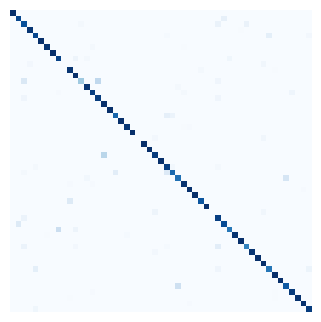

In [39]:
ax_len = len(set(truth))
lookup = dict([ (v,i) for i,v in enumerate(set(truth)) ])
mat = np.zeros((ax_len, ax_len))

for a,b in zip(truth, predictions_to_string):
    index_x, index_y = lookup[a], lookup[b]
    mat[index_x, index_y] += 1

normalised_mat = mat/np.sum(mat,axis=1)

plt.imshow(normalised_mat, cmap = "Blues", interpolation = "nearest")
plt.axis("off")

plt.savefig("confusion_matrix.png", dpi = 300)

So in over 4346 samples to predict, the neural network only got 218 incorrect! 

### Benchmarking
As a comparison, we can run a random forest for comparison:

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier()
rfc.fit(train_x[train_x.columns[:-1]].values, tissue_labels[train_y])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_predictions = rfc.predict(test_x[test_x.columns[:-1]].values)

In [28]:
truth = test_x["TissueSite"]
pred_frame_rf = pd.DataFrame(zip(truth, rf_predictions), columns = ["True Tissue", "Predicted Tissue (RF)"])

# Let's see how many are incorrect
pred_frame_rf[pred_frame_rf['True Tissue'] != pred_frame_rf['Predicted Tissue (RF)']].shape

(190, 2)

This means the random forest had a 95.3% accuracy on the test set!

### Interpretation

Hmm, interesting. So for the super hopeful, this result may seem like a surprise. How, or even why, is the random forest superior in this case? There are some things to be said here...

* The neural network that we've implemented is fairly basic. We only have one hidden layer, and for some applications, having more hidden layers can be a good way to increase accuracy. This could be one of those cases.
    * Possible solution: implement more layers.
* The choice of the activation function can be influential; we haven't exhaustively tested them here.
    * Possible solution: assess the impact of ReLU vs. Elu vs. Tanh... etc.
* Random forests are remarkably good at detecting which features are most important for class discrimination. This is possible because the random forest does lots and lots of sampling to figure out the most pertinent feature sets.
    * Possible solution: allow the neural network to train for a longer time (epochs) to determine the more relevant features in the dataset.
* The data itself could have other non-linear patterns that we have not fully exploited - anywhere from transforming the data (e.g. applying a kernel), to leveraging similar genes, are all options here.


## Conclusions
What next? Maybe for another time I'll cover more detailed neural network architectures, and how they can be used for other types of problems. While the genes were not ordered in a particular way, another possibility is to order them in a certain manner that makes the gene expression matrix amenable to other deep learning methods like the convolutional neural network. Or we can even explore using [autoencoders to cluster gene expression data](https://www.nature.com/articles/s42256-019-0037-0).

For now, this is a wrap, and see you next time!

## Appendix

### 2. Optimisation of weights

If you're familiar with the mathematical theory behind linear regression, you would know that it's essentially finding a line that minimises the residuals, or _errors_ , of the prediction against your observations. This is done by (long story short) some fancy matrix algebra along the lines of

$$ \beta = (X^TX)^{-1}X^Ty $$

For neural networks, we often define a method to quantify that error in the form of a _loss function_. Essentially, this loss function states how far the prediction is from the true value that we're trying to predict. There are loss functions for various types of data we want to predict. For instance, if we're predicting what class a data point belongs to (i.e. a classification problem), we can use _cross-entropy_, or when we are predicting a continuous value (e.g. length of a throw given some conditions), then we can use _mean absolute error_, etc.

Whatever the loss function, neural networks use a technique called _backpropagation_ which takes the derivative of the loss function **with respect to the weights**. We use the derivative because this tells us how much the value of the loss function changes when we change the weights. Neat, right? These derivatives can then be used by optimisation algorithms like gradient descent.

If you're familiar with calculus notations, we're effectively trying to evaluate

$$ \dfrac{\partial L}{\partial w} $$ 

which is then used to update the weights,

$$ w \leftarrow w + \alpha \dfrac{\partial L}{\partial w} $$

where $\alpha$ represents a "learning rate" to help convergence. While backpropagation is powerful, it doesn't really carry a biological meaning. The implication here is that somehow we feed things backward to tell an upstream neuron how wrong it was.

### 3. Many, many different architectures

Why is it that "neural networks" always seem to headline insane prediction successes? That's because neural networks can be flexibly constructed for different data types. For example,

* Convolutional neural networks use a 2D-set up of neurons to perceive a wider "field" of data - this is particularly useful for images.
* Recurrent neural networks have a repeated, sequential structure that's suited for speech / text.
* Even traditional "feed-forward" neural networks, like one we'll code today, can use tricks like "dropout" to ensure that there isn't a huge over-fit to the data.

This is a section that deserves a post on its own!